In [ ]:
#  2025 
#  Figure 2C and 2D.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


In [24]:
# load data to use in analysis

df_npq =  pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="NPQ_and_SIMOA_Data")



In [25]:
# Build mapping dict for Mapping Target Names to be used in paper
df_target_names = pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="Target Name")
mapping = dict(zip(df_target_names["Target Name on NULISAseq™ CNS Disease Panel "], df_target_names["Target Name used in the paper"]))

# Rename columns
data = df_npq.rename(columns=mapping)

In [36]:

# Creating a function to compute correlation and p-values
def compute_corr_pvalues(df, group, markers):

    df = df[df["Group"] == group]
    df = df[markers]

    results = []
    for row in df.columns:
        for col in df.columns:
            if row != col:
                corr, pval = spearmanr(df[row], df[col], nan_policy='omit')
                results.append({'Biomarker1': row, 'Biomarker2': col, 'Spearman Correlation': corr, 'p-value': pval})
            else:
                results.append({'Biomarker1': row, 'Biomarker2': col, 'Spearman Correlation': 1.0, 'p-value': 0.0})
    results_df = pd.DataFrame(results)
    return results_df


# Creating a function to plot correlation matrix with significance and vertical ticks
def plot_corr_with_significance(results_df, group):
    # Create correlation and p-value matrices
    corr_matrix = results_df.pivot(index='Biomarker1', columns='Biomarker2', values='Spearman Correlation')
    pval_matrix = results_df.pivot(index='Biomarker1', columns='Biomarker2', values='p-value')
    
    # Mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Prepare annotations with asterisks for significant p-values
    annotations = corr_matrix.copy().astype(str)
    for row in corr_matrix.index:
        for col in corr_matrix.columns:
            corr_value = corr_matrix.loc[row, col]
            p_value = pval_matrix.loc[row, col]
            if row == col:
                annotations.loc[row, col] = "1.00"
            elif p_value < 0.05:
                annotations.loc[row, col] = f"{corr_value:.2f}*"
            else:
                annotations.loc[row, col] = f"{corr_value:.2f}"
    
    # Plot the heatmap
    plt.figure(figsize=(16, 14))
    sns.heatmap(
        corr_matrix, annot=annotations, fmt="", cmap="coolwarm", vmin=-1, vmax=1,
        mask=mask, cbar_kws={'label': "Spearman's R", "orientation": "horizontal", "pad": 0.3}, annot_kws={"fontsize":20})
    
    # Add central black boxes for the diagonal
    for i in range(len(corr_matrix.columns)):
        plt.gca().add_patch(
            plt.Rectangle((i, i), 1, 1, fill=False, color='grey', alpha=0.6, lw=1))
    
    # Set titles and adjust tick orientations
    plt.title(f"Correlation Matrix for Serum Biomarkers in {group}", fontsize=40, pad=50) 
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize = 30) 
    cbar.set_label("Spearman's R", fontsize = 30, labelpad = 50) 
    plt.xticks(rotation=90, fontsize=30, ha='center')  # Rotate x-ticks vertically
    plt.yticks(rotation=0, fontsize=30, va='center')   # Rotate y-ticks vertically
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()
    plt.savefig(f".\\figures\\corr_matrix_{group}.png", dpi=300)
    plt.show()



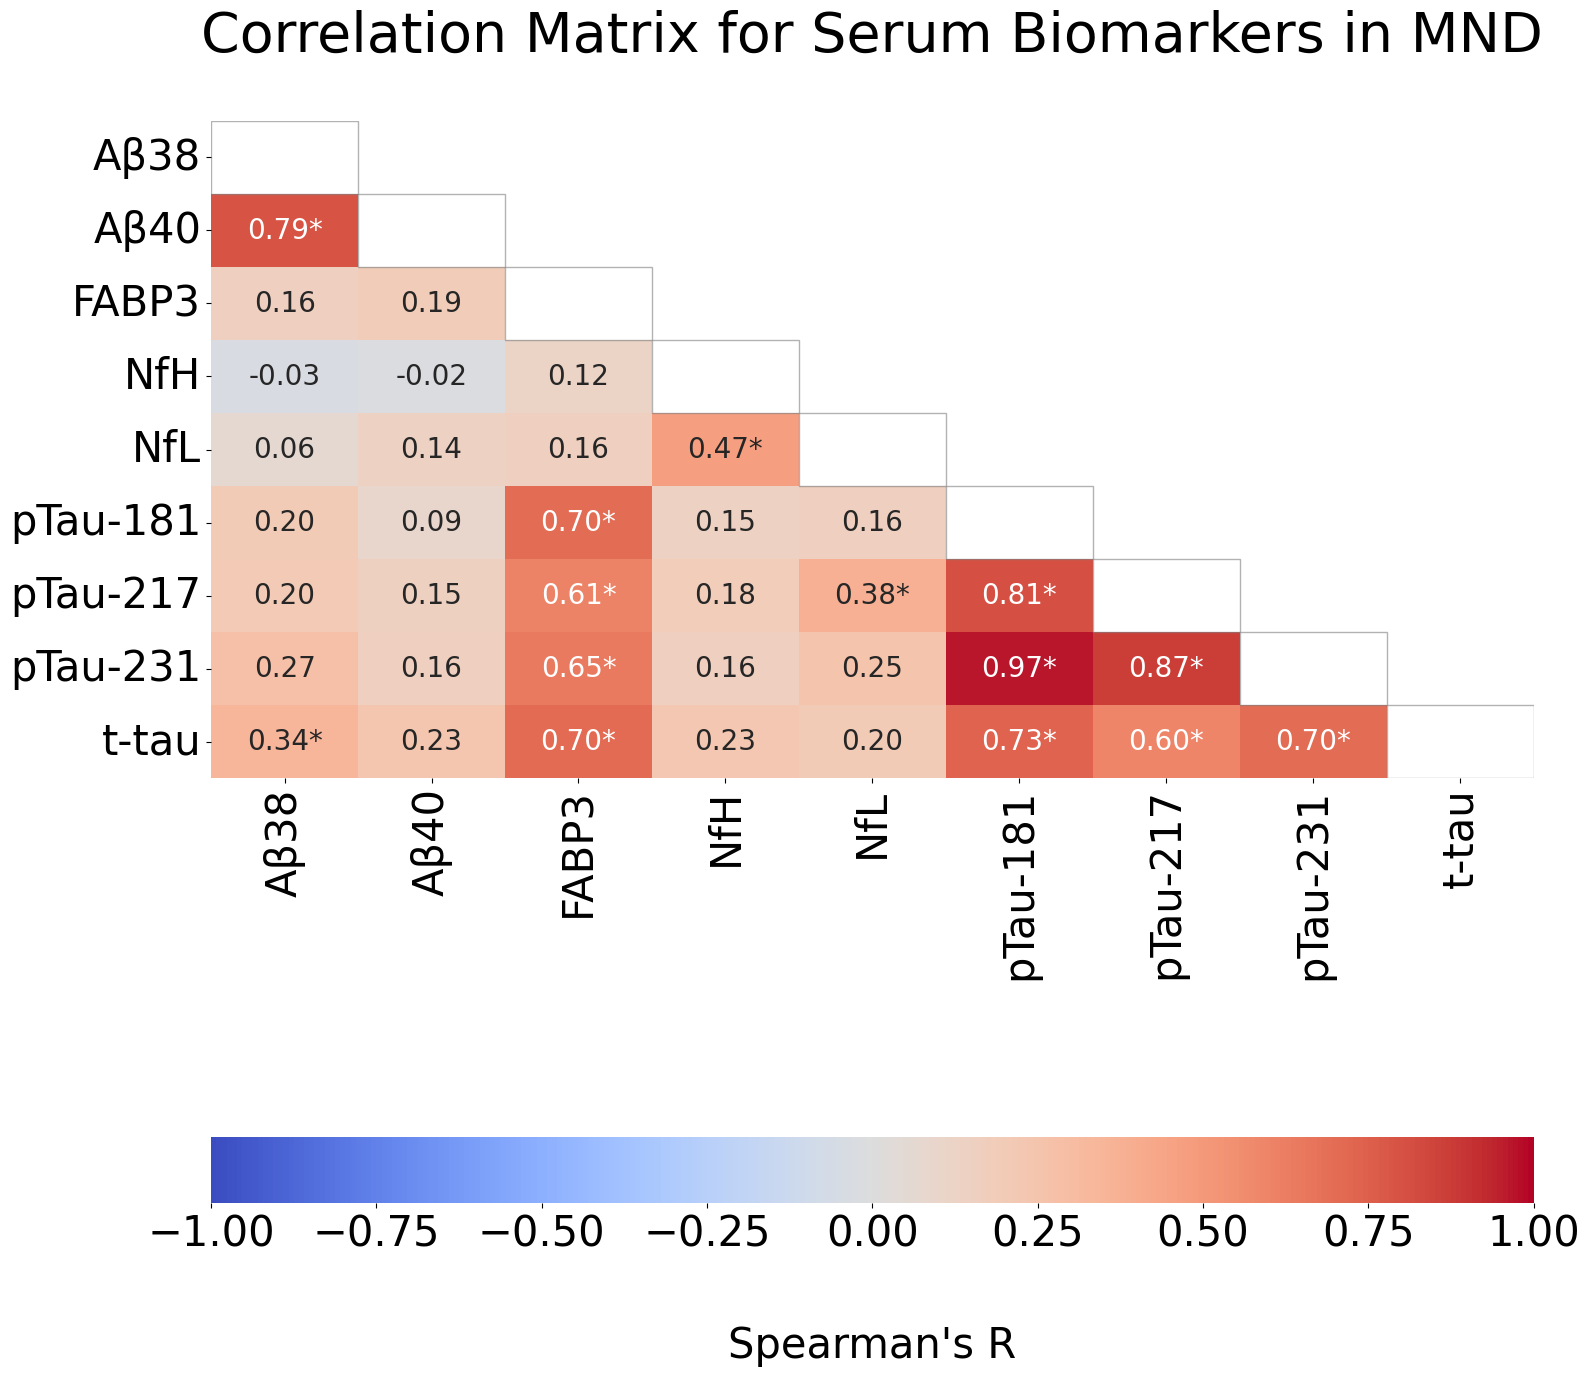

In [37]:
# Conduct analysis - Figure 2C

# select markers for correlation matrix in MND group
markers = [ "Aβ38", "Aβ40",  "FABP3", "NfL", "NfH", "pTau-181", "pTau-217", "pTau-231", "t-tau"]

# select group
group_mnd = "MND"

# Compute correlations and p-values
p_values_mnd = compute_corr_pvalues(data, group_mnd, markers)

# Plot the correlation matrix with significance
plot_corr_with_significance(p_values_mnd, group_mnd)

# # # Save the results  
# p_values.to_csv("corr_matrix_mnd.csv", index=False)
# # # Round only float columns to 2 decimals
# float_cols = p_values.select_dtypes(include="float").columns
# p_values[float_cols] = p_values[float_cols].round(2)
# p_values.to_csv("corr_matrix_mnd_rounded.csv", index=False)

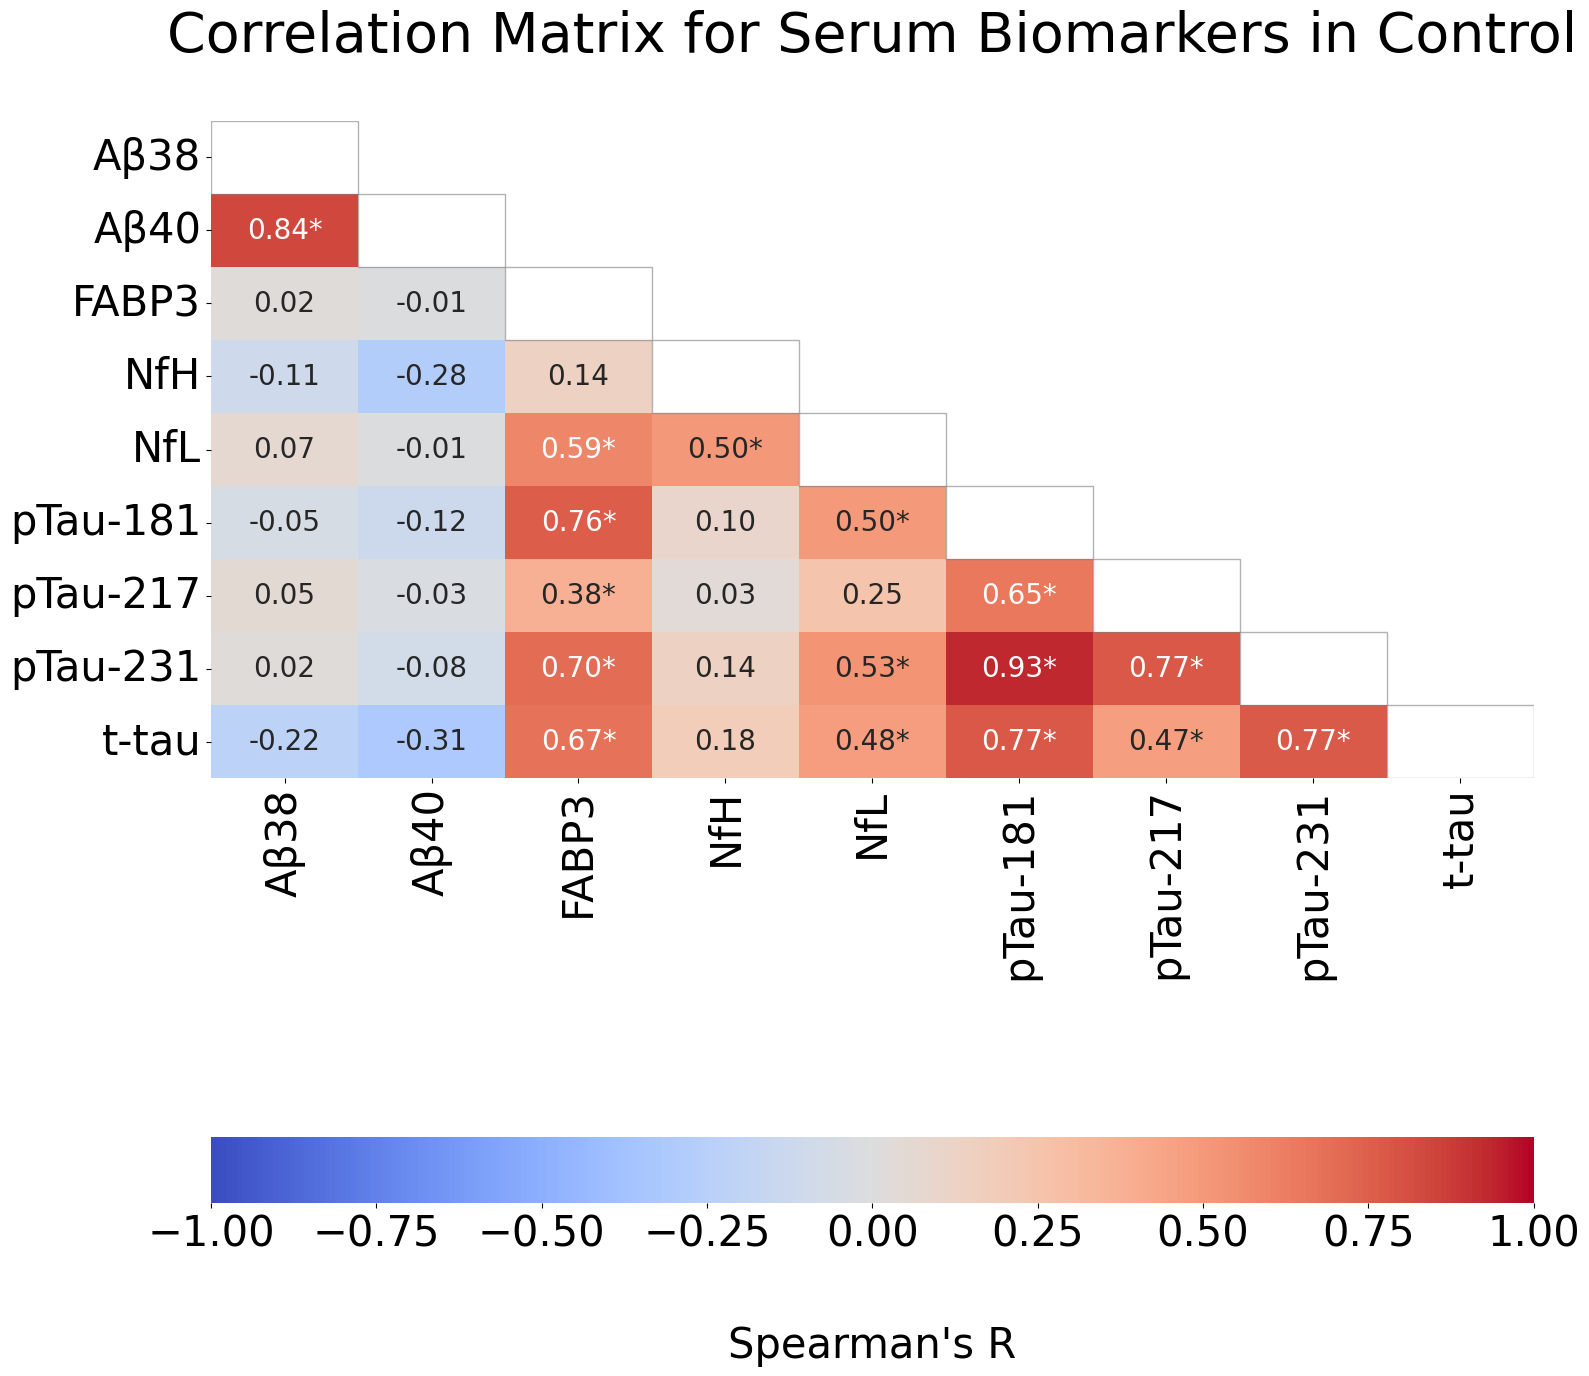

In [38]:
# Conduct analysis - Figure 2D

# select markers for correlation matrix in Control Group
markers = [ "Aβ38", "Aβ40",  "FABP3", "NfL", "NfH", "pTau-181", "pTau-217", "pTau-231", "t-tau"]

# select group 
group_control = "Control"

# Compute correlations and p-values
p_values_control = compute_corr_pvalues(data, group_control, markers)

# Plot the correlation matrix with significance
plot_corr_with_significance(p_values_control, group_control)

# # # Save the results
# p_values.to_csv("corr_matrix_control.csv", index=False)
# # # Round only float columns to 2 decimals
# float_cols = p_values.select_dtypes(include="float").columns
# p_values[float_cols] = p_values[float_cols].round(2)
# p_values.to_csv("corr_matrix_control_rounded.csv", index=False)